<a href="https://colab.research.google.com/github/melibrun/free-time/blob/main/Bioinf_Markov_Dz_4_Ivanova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class Markov:
    def __init__(self, states,emissions,p_of_transition):
        self.states = states
        self.emissions = emissions
        self.p_of_transition = p_of_transition
    


        
    def Viterbi(self, string):
        Pr = []
        Prev_state = []
        Pr.append({})
        Prev_state.append({})
        for state in self.states:
            Pr[0][state] = self.p_of_transition["Begin"][state] * self.emissions[state][string[0]]
            Prev_state[0][state] = "Begin"
        for i in range(1,len(string)):
            Pr.append({})
            Prev_state.append({})
            for state in self.states:
                max = 0
                max_state = "Bg"
                for pr_state in self.states:
                    kur = Pr[i-1][pr_state] * self.p_of_transition[pr_state][state] * self.emissions[state][string[i]]
                    if kur > max:
                        max = kur
                        max_state = pr_state
                Pr[i][state] = max
                Prev_state[i][state] = max_state
        Pr.append({})
        Prev_state.append({})
        for pr_state in self.states:
            kur = Pr[i][pr_state] * self.p_of_transition[pr_state]["End"]
            if kur > max:
                max = kur
                max_state = pr_state
        Pr[i+1]["End"] = max
        Prev_state[i+1]["End"] = max_state

         

        kur_state = "End"
        i += 1
        ansv = ""
        while Prev_state[i][kur_state] != "Begin":
            if Prev_state[i][kur_state] == "Bg":
                ansv = string[i-1].lower() + ansv
            else:
                ansv = string[i-1] + ansv
            kur_state = Prev_state[i][kur_state]
            i -= 1
            
        
        return ansv, max
    

    def Forward_Backward(self, string, pos):
        alpha = [{"Begin": 1}]
        i = 0
        for i in range(pos):
            alpha.append({})
            for state in self.states:
                s = 0
                for pr_state in alpha[i].keys():
                    s += alpha[i][pr_state] * self.p_of_transition[pr_state][state] * self.emissions[state][string[i]]
                alpha[i+1][state] = s
        s = 0
        for pr_state in alpha[i].keys():
            s += alpha[i][pr_state] * self.p_of_transition[pr_state]["Bg"] * self.emissions["Bg"][string[pos]]
        ansv = s
        i = 0
        betta = [{"End":1}]
        for i in range(len(string) - pos ):
            betta.append({})
            for state in self.states:
                s = 0
                for nxt_state in betta[i].keys():
                    s += betta[i][nxt_state] * self.p_of_transition[state][nxt_state] * self.emissions[state][string[len(string) - i - 1]]
                betta[i+1][state] = s
        s=0
        for nxt_state in betta[i].keys():
            s += betta[i][nxt_state] * self.p_of_transition["Bg"][nxt_state] 
        ansv *= s

        for i in range(len(string)):
            alpha.append({})
            for state in self.states:
                s = 0
                for pr_state in alpha[i].keys():
                    s += alpha[i][pr_state] * self.p_of_transition[pr_state][state] * self.emissions[state][string[i]]
                alpha[i+1][state] = s
        s = 0
        for pr_state in alpha[i].keys():
            s += alpha[i][pr_state] * self.p_of_transition[pr_state]["End"]

        return ansv / s
        
        






    

In [ ]:
states_s = [ "Bg", "A", "C", "G", "T", "End"]
p_of_transition_s = {
    "Begin":{   "Bg":0.99,  "A":0.01,   "C":0,  "G":0,  "T":0,  "End":0     },
    "Bg":{      "Bg":0.98,  "A":0.01,   "C":0,  "G":0,  "T":0,  "End":0.01  },
    "A":{       "Bg":0,     "A":0,      "C":1,  "G":0,  "T":0,  "End":0     },
    "C":{       "Bg":0,     "A":0,      "C":0,  "G":1,  "T":0,  "End":0     },
    "G":{       "Bg":0,     "A":0,      "C":0,  "G":0,  "T":1,  "End":0     },
    "T":{       "Bg":0.98,  "A":0.01,   "C":0,  "G":0,  "T":0,  "End":0.01  },
    "End":{     "Bg":0,     "A":0,      "C":0,  "G":0,  "T":0,  "End":0     }
    }
emissions_s = {
    "Bg":   {   "A":0.25,  "C":0.25,   "G":0.25,   "T":0.25    }, 
    "A":    {   "A":1,     "C":0,      "G":0,      "T":0       },    
    "C":    {   "A":0,     "C":1,      "G":0,      "T":0       }, 
    "G":    {   "A":0,     "C":0,      "G":1,      "T":0       }, 
    "T":    {   "A":0,     "C":0,      "G":0,      "T":1       },
    "End":  {   "A":0,     "C":0,      "G":0,      "T":0       }
}


In [ ]:
f = "gataggattatcattcataagtttcagagcaatgtccttattctggaacttggatttatggctcttttggtttaatttcgcctgattcttgatctcctttagcttctcgacgtgggcctttttcttgccatatggatccgctgcacggtcctgttccctagcatgtacgtgagcgtatttccttttaaaccacgacgctttgtcttcattcaacgtttcccattgtttttttctactattgctttgctgtgggaaaaacttatcgaaagatgacgactttttcttaattctcgttttaagagcttggtgagcgctaggagtcactgccag"
string = f.upper()
print(string)

GATAGGATTATCATTCATAAGTTTCAGAGCAATGTCCTTATTCTGGAACTTGGATTTATGGCTCTTTTGGTTTAATTTCGCCTGATTCTTGATCTCCTTTAGCTTCTCGACGTGGGCCTTTTTCTTGCCATATGGATCCGCTGCACGGTCCTGTTCCCTAGCATGTACGTGAGCGTATTTCCTTTTAAACCACGACGCTTTGTCTTCATTCAACGTTTCCCATTGTTTTTTTCTACTATTGCTTTGCTGTGGGAAAAACTTATCGAAAGATGACGACTTTTTCTTAATTCTCGTTTTAAGAGCTTGGTGAGCGCTAGGAGTCACTGCCAG


In [ ]:
M1 = Markov(states_s,emissions_s,p_of_transition_s)


In [ ]:
a = {"pos":[],"pr":[]}
for i in range(len(string)):
    a["pos"].append(i)
    a["pr"].append(M1.Forward_Backward(string,i))


In [ ]:
import pandas as pd
import random as rnd
import seaborn as sb

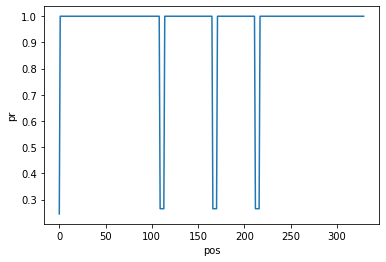

In [ ]:
dt = pd.DataFrame(a)
sb.lineplot(data = dt, x="pos", y="pr")